# 一个单层的CNN多分类网络
网络结构由之前我们定义的类ShallowNet构建

In [3]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imgpreprocess.imgtoarray import ImgToArray
from imgpreprocess.imgresize import ImgResize
from imgdatasets.imgload import ImgLoad
from nn.conv.shallownet import ShallowNet
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [2]:
'''
ap = argparse.ArgumentParser()
ap.add_argument("-d", "--dataset", required=True,
               help="path to input dataset")
args = vars(ap.parse_args())
'''

In [4]:
print("[INFO] loading images...")
#imagePaths = list(paths.list_images(args["dataset"]))
imagePaths = list(paths.list_images("../imgdatasets/animals3"))
print("[INFO] load images dnoe...")

[INFO] loading images...
[INFO] load images dnoe...


In [8]:
print("[INFO] images preprocessing...")
resize = ImgResize(32, 32)
imgtoarray = ImgToArray()

imgload = ImgLoad(preprocessors=[resize, imgtoarray])
(data, labels) = imgload.load(imagePaths, verbose=500)
data = data.astype("float") / 255.0
print("[INFO] images preprocess done")

[INFO] images preprocessing...
[INFO] images preprocess done


In [16]:
print("[INFO] train test dataset split")
(trainX, testX, trainY, testY) = train_test_split(data, labels,
    test_size=0.25, random_state=42, stratify=labels)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

[INFO] train test dataset split


In [11]:
print("[INFO] compiling model...")
opt = SGD(lr=0.005)
model = ShallowNet.build(width=32, height=32, depth=3, classes=3)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])

[INFO] compiling model...


In [12]:
print("[INFO] trainning network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),
    batch_size=32, epochs=50, verbose=1)

[INFO] trainning network...
Epoch 1/50
210/210 [==============================] - 10s 45ms/step - loss: 0.9588 - accuracy: 0.5619 - val_loss: 1.2983 - val_accuracy: 0.3054
Epoch 2/50
210/210 [==============================] - 10s 46ms/step - loss: 0.8804 - accuracy: 0.6161 - val_loss: 0.8736 - val_accuracy: 0.6019
Epoch 3/50
210/210 [==============================] - 11s 52ms/step - loss: 0.8521 - accuracy: 0.6289 - val_loss: 0.8532 - val_accuracy: 0.6270
Epoch 4/50
210/210 [==============================] - 12s 56ms/step - loss: 0.8355 - accuracy: 0.6385 - val_loss: 0.8511 - val_accuracy: 0.6368
Epoch 5/50
210/210 [==============================] - 13s 64ms/step - loss: 0.8217 - accuracy: 0.6494 - val_loss: 0.8342 - val_accuracy: 0.6413
Epoch 6/50
210/210 [==============================] - 10s 49ms/step - loss: 0.8086 - accuracy: 0.6555 - val_loss: 0.8328 - val_accuracy: 0.6319
Epoch 7/50
210/210 [==============================] - 9s 44ms/step - loss: 0.7977 - accuracy: 0.6576 - val_l

In [17]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1),
    target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

        cane       0.77      0.85      0.81      1216
     cavallo       0.64      0.71      0.67       656
    elefante       0.76      0.34      0.47       361

    accuracy                           0.73      2233
   macro avg       0.72      0.63      0.65      2233
weighted avg       0.73      0.73      0.71      2233



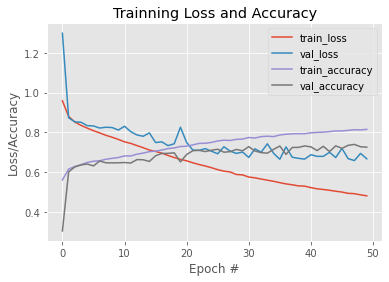

In [14]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_accuracy")
plt.title("Trainning Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("./results/shallownet_animals3_trainning_result")